# Análisis de datos comparativo de brotes [coronavirus, ébola y SARS] con Python

* SARS (Sever Acute Respiratory Syndrome)
* Ébola (Ebola haemorrhagic fever (EHF))
* COVID-19 (coronavirus disease 2019)

## Fuentes de datos
* https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
* https://github.com/reconhub/outbreaks

## Preguntas
* ¿Qué países fueron afectados?
* ¿Cuántos casos (confirmados / recuperados / fallecidos) en total?
* Principales países afectados
* ¿Cómo es la tendencia de cada enfermedad?
* Día con el número máximo de casos
* ¿Cuánto duró cada pandemia?
* etc.

In [1]:
# Load EDA
import pandas as pd
import geopandas as gpd
import descartes

In [2]:
# Load Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load Dataset
sars = pd.read_csv("dataset/pandemic_sars_dataset.csv")
ebola = pd.read_csv("dataset/pandemic_ebola_dataset.csv")
covid = pd.read_csv("dataset/coronavirus_dataset_20200403-142011.csv")

## Data Analysis for SARS

In [4]:
# Data Analysis of SARS
sars.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
0,2003-03-17,Germany,1,0,0,51.0000,9.0000
1,2003-03-17,Canada,8,2,0,64.2823,-135.0000
2,2003-03-17,Singapore,20,0,0,1.2833,103.8333
3,2003-03-17,Hong Kong,95,1,0,NaN,NaN
4,2003-03-17,Switzerland,2,0,0,46.8182,8.2275


In [5]:
sars.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Lat',
       'Long'],
      dtype='object')

In [6]:
# Number of Cases Per Day
sars_per_day = sars.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].max()

In [7]:
sars_per_day

,Confirmed,Deaths,Recovered
Date,,,
2003-03-17,95,2,0
2003-03-18,123,2,0
2003-03-19,150,5,0
2003-03-20,173,6,0
2003-03-21,203,6,0
...,...,...,...
2003-07-07,5327,348,4934
2003-07-08,5327,348,4934
2003-07-09,5327,348,4939


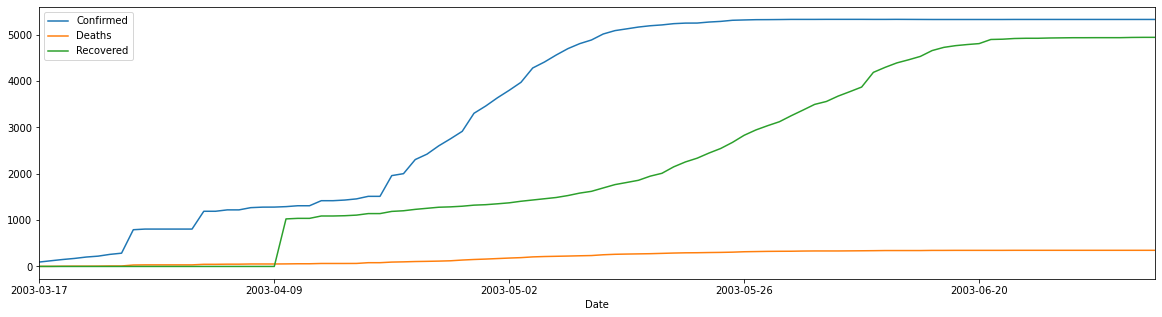

In [8]:
# Pictorial Analysis for SARS
sars_per_day.plot(kind='line',figsize=(20,5))

## Data Analysis for Ébola

In [9]:
# Data Analysis of Ébola
ebola.head()

,Country/Region,Date,Confirmed,Deaths,Lat,Long
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889


In [10]:
ebola.columns

Index(['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Lat', 'Long'], dtype='object')

In [11]:
# Number of Cases Per Day
ebola_per_day = ebola.groupby('Date')['Confirmed', 'Deaths'].max()

In [12]:
ebola_per_day

,Confirmed,Deaths
Date,,
2014-08-29,935.0,380.0
2014-09-05,1146.0,443.0
2014-09-08,1234.0,508.0
2014-09-12,1287.0,498.0
2014-09-16,1464.0,563.0
...,...,...
2015-12-17,8704.0,3589.0
2015-12-22,8704.0,3589.0
2015-12-23,8704.0,3589.0


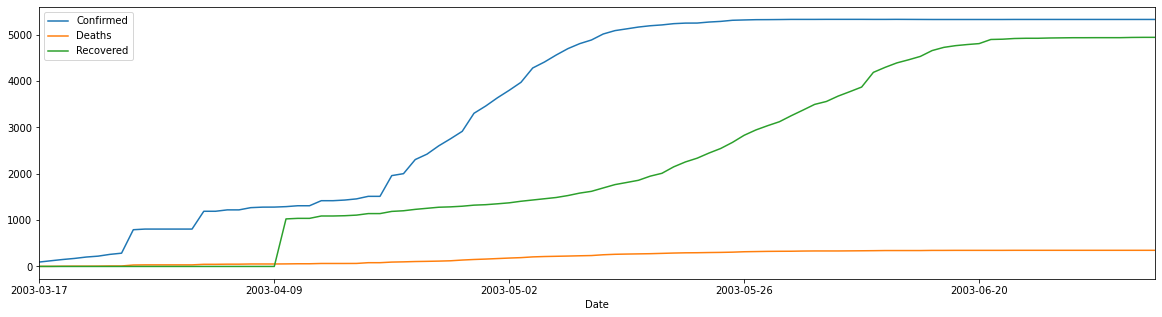

In [13]:
sars_per_day.plot(kind='line',figsize=(20,5))

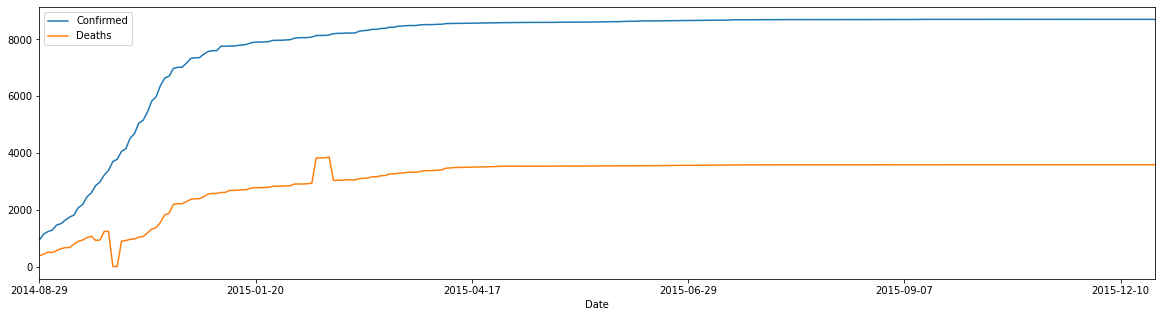

In [14]:
ebola_per_day.plot(kind='line',figsize=(20,5))

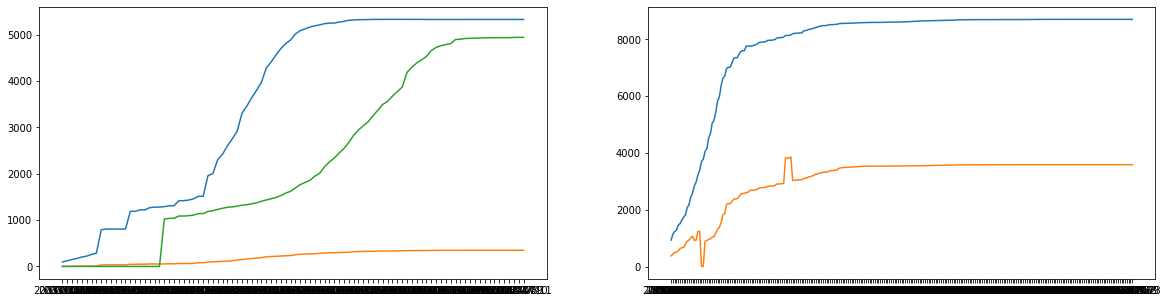

In [15]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)

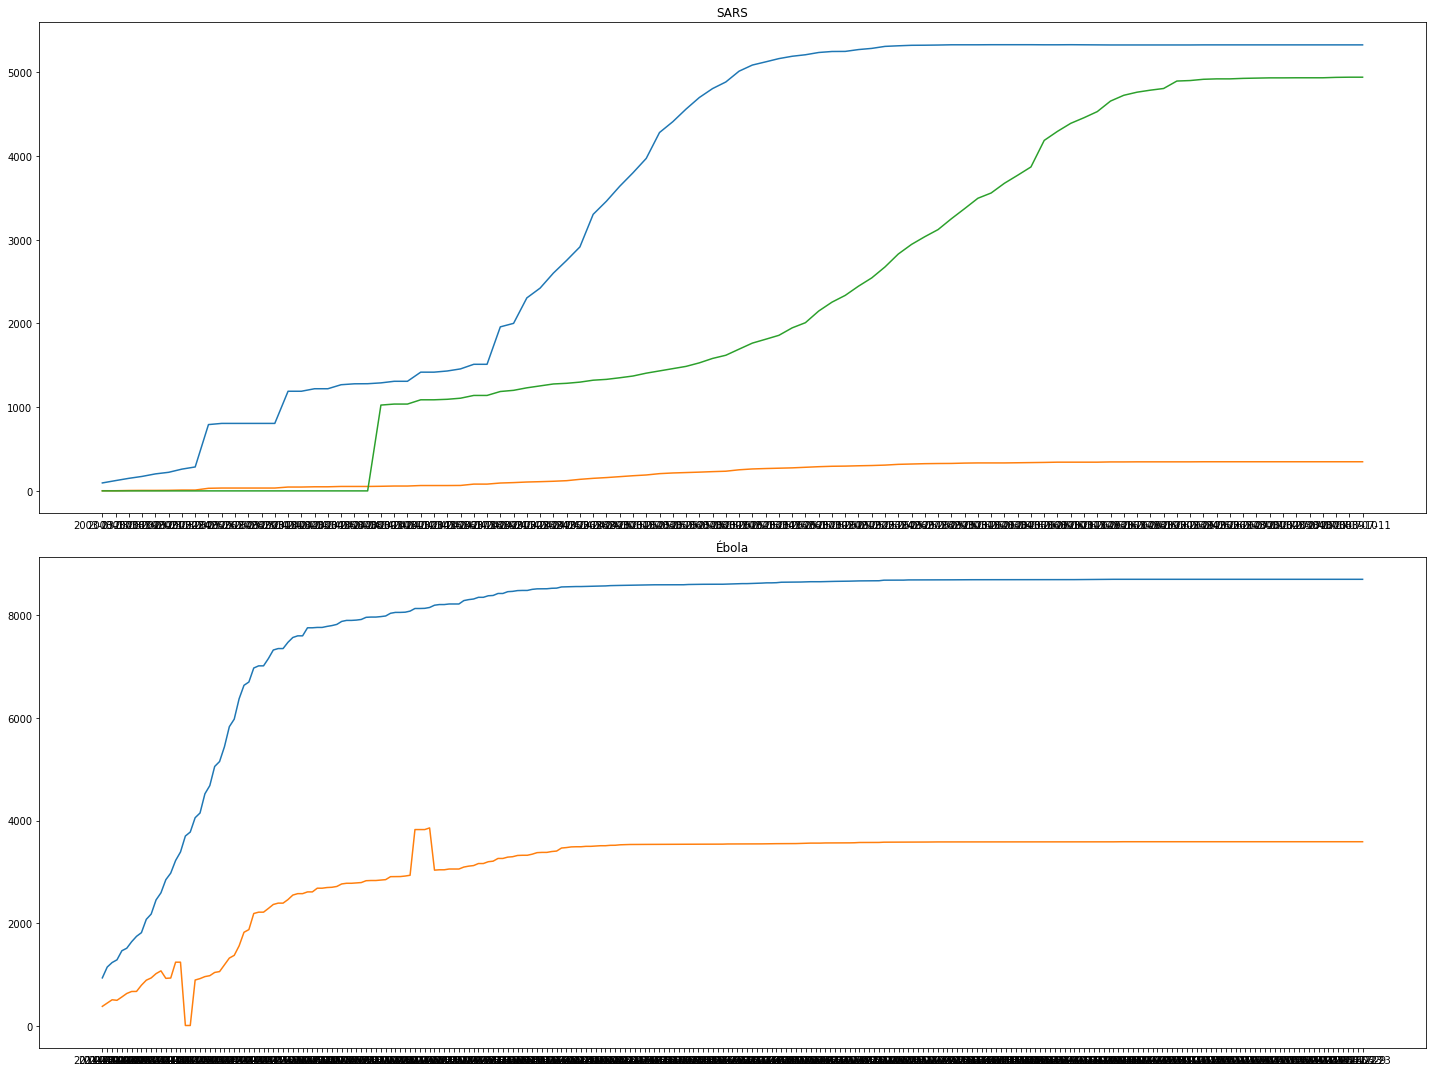

In [16]:
fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))
axes[0].plot(sars_per_day)
axes[0].set_title('SARS')
axes[1].plot(ebola_per_day)
axes[1].set_title('Ébola')
fig.tight_layout()

## Data Analysis for Covid-19

In [17]:
# Analysis of Covid
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0


In [18]:
covid_per_day = covid.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].max()

In [19]:
covid_per_day

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28.0
1/23/20,444,17,28.0
1/24/20,549,24,31.0
1/25/20,761,40,42.0
1/26/20,1058,52,45.0
...,...,...,...
3/7/20,67666,2959,47743.0
3/8/20,67707,2986,49134.0
3/9/20,67743,3008,50318.0


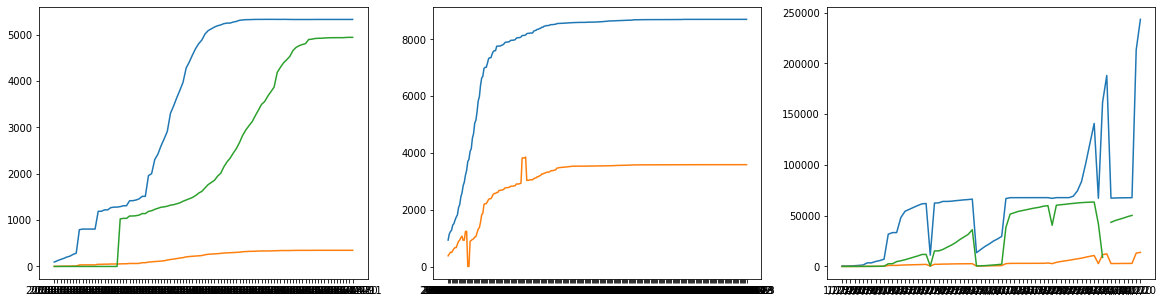

In [20]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
axes[0].plot(sars_per_day)
axes[1].plot(ebola_per_day)
axes[2].plot(covid_per_day)

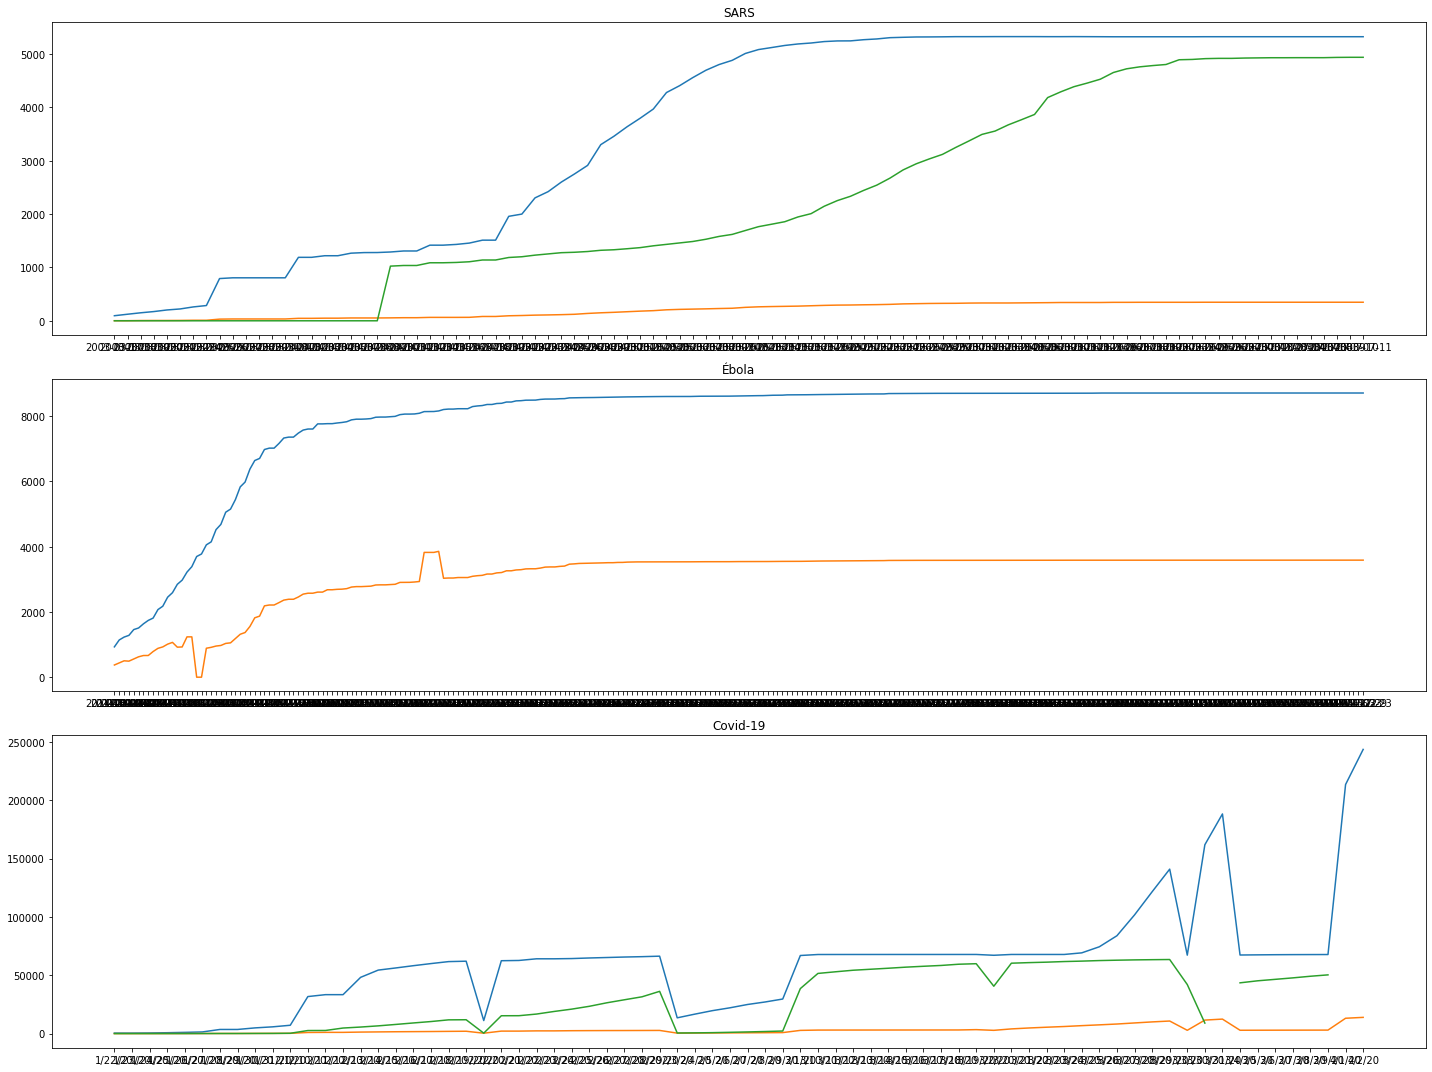

In [21]:
fig,axes = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
axes[0].plot(sars_per_day)
axes[0].set_title('SARS')
axes[1].plot(ebola_per_day)
axes[1].set_title('Ébola')
axes[2].plot(covid_per_day)
axes[2].set_title('Covid-19')
fig.tight_layout()

## Checking for the first 100 days

In [22]:
# Checking for the first 100 days
import datetime

In [23]:
sars_cases = pd.read_csv("dataset/pandemic_sars_dataset.csv",parse_dates=['Date'],index_col='Date')
ebola_cases = pd.read_csv("dataset/pandemic_ebola_dataset.csv",parse_dates=['Date'],index_col='Date')
covid_cases = pd.read_csv("dataset/coronavirus_dataset_20200403-142011.csv",parse_dates=['Date'],index_col='Date')

### SARS

In [24]:
sars_cases

,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
Date,,,,,,
2003-03-17,Germany,1,0,0,51.0000,9.0000
2003-03-17,Canada,8,2,0,64.2823,-135.0000
2003-03-17,Singapore,20,0,0,1.2833,103.8333
2003-03-17,Hong Kong,95,1,0,NaN,NaN
2003-03-17,Switzerland,2,0,0,46.8182,8.2275
...,...,...,...,...,...,...
2003-07-11,Switzerland,1,0,1,46.8182,8.2275
2003-07-11,Thailand,9,2,7,15.0000,101.0000
2003-07-11,United Kingdom,4,0,4,21.6940,-71.7979


In [25]:
# Checking for 1st 100 days
sars_start_date = '2003-03-17'
#day_100_sars =

In [26]:
import datetime

In [27]:
datetime.datetime.strptime(sars_start_date,"%Y-%m-%d") + datetime.timedelta(days=100)

datetime.datetime(2003, 6, 25, 0, 0)

In [28]:
def get_100_days(start_date):
    day_100 = datetime.datetime.strptime(start_date,"%Y-%m-%d") + datetime.timedelta(days=100)
    return day_100

In [29]:
get_100_days(sars_start_date)

datetime.datetime(2003, 6, 25, 0, 0)

In [30]:
sars_cases['2003-03-17':'2003-6-25']

,Country/Region,Confirmed,Deaths,Recovered,Lat,Long
Date,,,,,,
2003-03-17,Germany,1,0,0,51.0000,9.0000
2003-03-17,Canada,8,2,0,64.2823,-135.0000
2003-03-17,Singapore,20,0,0,1.2833,103.8333
2003-03-17,Hong Kong,95,1,0,NaN,NaN
2003-03-17,Switzerland,2,0,0,46.8182,8.2275
...,...,...,...,...,...,...
2003-06-25,Switzerland,1,0,1,46.8182,8.2275
2003-06-25,Thailand,9,2,7,15.0000,101.0000
2003-06-25,United Kingdom,4,0,4,21.6940,-71.7979


### Ébola

In [31]:
# Ebola
ebola_start_day = "2014-08-29"
covid_start_day = "2020-01-22"

In [32]:
print(get_100_days(ebola_start_day))
print(get_100_days(covid_start_day))

2014-12-07 00:00:00
2020-05-01 00:00:00


In [33]:
sars_day_100 = sars_cases['2003-03-17':'2003-6-25']
ebola_day_100 = ebola_cases[ebola_start_day:'2014-12-07']
covid_day_100 = covid_cases[covid_start_day:'2020-05-01']

In [34]:
sars_day_100.groupby(sars_day_100.index)['Confirmed','Deaths','Recovered'].max()

,Confirmed,Deaths,Recovered
Date,,,
2003-03-17,95,2,0
2003-03-18,123,2,0
2003-03-19,150,5,0
2003-03-20,173,6,0
2003-03-21,203,6,0
...,...,...,...
2003-06-19,5326,347,4786
2003-06-20,5326,347,4806
2003-06-23,5326,347,4895


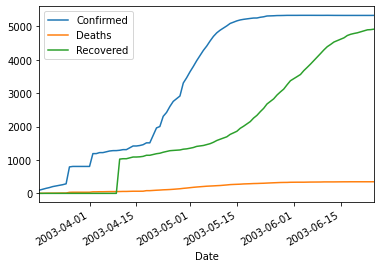

In [35]:
# Plot SARS
sars_day_100.groupby(sars_day_100.index)['Confirmed','Deaths','Recovered'].max().plot(kind='line')

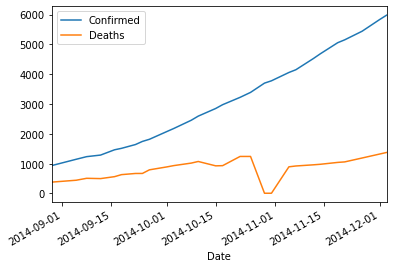

In [36]:
# Plot Ébola
ebola_day_100.groupby(ebola_day_100.index)['Confirmed','Deaths'].max().plot(kind='line')

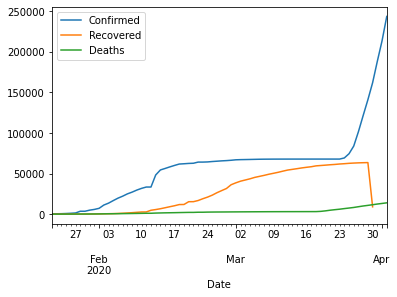

In [37]:
# Plot Covid-19
covid_day_100.groupby(covid_day_100.index)['Confirmed','Recovered','Deaths'].max().plot(kind='line')

In [38]:
### Top COuntries Affected
ebola

,Country/Region,Date,Confirmed,Deaths,Lat,Long
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889
...,...,...,...,...,...,...
2480,Liberia,2016-03-23,3151.0,NaN,6.428100,-9.429500
2481,Italy,2016-03-23,1.0,NaN,43.000000,12.000000
2482,Liberia,2016-03-23,2.0,1.0,6.428100,-9.429500
2483,Nigeria,2016-03-23,19.0,7.0,9.082000,8.675300


In [39]:
grp_countries_ebola = ebola.groupby('Country/Region')['Confirmed','Deaths'].max()

In [40]:
# Countries Affected
grp_countries_ebola

,Confirmed,Deaths
Country/Region,,
Guinea,3351.0,2083.0
Italy,1.0,0.0
Liberia,3153.0,3858.0
Mali,7.0,5.0
Nigeria,19.0,7.0
Senegal,1.0,0.0
Sierra Leone,8704.0,3589.0
Spain,1.0,0.0
US,4.0,1.0


### Number of Countries Affected (Ébola, Covid-19, SARS)

In [41]:
# Number of Countries Affected (Ébola)
len(ebola['Country/Region'].unique())

10

In [42]:
# Number of Countries Affected (Covid-19)
len(covid['Country/Region'].unique())

181

In [43]:
# Number of Countries Affected (SARS)
len(sars['Country/Region'].unique())

36

### Top Countries Affect by Confirmed Cases

In [44]:
# Top Countries Affect by Confirmed Cases (Ébola)
grp_countries_ebola.nlargest(3,'Confirmed')

,Confirmed,Deaths
Country/Region,,
Sierra Leone,8704.0,3589.0
Guinea,3351.0,2083.0
Liberia,3153.0,3858.0


In [45]:
# Top Countries Affect By Death (Ébola)
grp_countries_ebola.nlargest(3,'Deaths')

,Confirmed,Deaths
Country/Region,,
Liberia,3153.0,3858.0
Sierra Leone,8704.0,3589.0
Guinea,3351.0,2083.0


In [46]:
grp_countries_sars = sars.groupby('Country/Region')['Confirmed','Recovered','Deaths'].max()
# Covid
grp_countries_covid = covid.groupby('Country/Region')['Confirmed','Recovered','Deaths'].max()

In [47]:
# Top Countries Affect By Death (SARS)
grp_countries_sars.nlargest(10,'Deaths')

,Confirmed,Recovered,Deaths
Country/Region,,,
China,5329,4941,348
Hong Kong,1755,1433,298
Taiwan*,698,507,84
Canada,252,194,38
Singapore,206,172,32
Vietnam,63,58,5
Malaysia,8,5,2
Philippines,14,12,2
Thailand,9,7,2


In [48]:
# Top Countries Affect By Confirmed (SARS)
grp_countries_sars.nlargest(10,'Confirmed')

,Confirmed,Recovered,Deaths
Country/Region,,,
China,5329,4941,348
Hong Kong,1755,1433,298
Taiwan*,698,507,84
Canada,252,194,38
US,220,67,0
Singapore,206,172,32
Vietnam,63,58,5
Philippines,14,12,2
Germany,10,9,0


In [49]:
# Top Countries Affect By Confirmed (SARS)
grp_countries_sars.nsmallest(10,'Confirmed')

,Confirmed,Recovered,Deaths
Country/Region,,,
Belgium,1,0,0
Bulgaria,1,0,0
Colombia,1,1,0
Finland,1,1,0
Kuwait,1,1,0
New Zealand,1,1,0
Poland,1,0,0
Russia,1,0,0
Slovenia,1,0,0


In [50]:
# Top Countries Affect By Death (Covid-19)
grp_countries_covid.nlargest(10,'Deaths')

,Confirmed,Recovered,Deaths
Country/Region,,,
Italy,115242,935.0,13915
Spain,112065,2959.0,10348
US,243453,40592.0,5926
France,59105,51553.0,5387
China,67802,56003.0,3199
Iran,50468,62889.0,3160
United Kingdom,33718,60324.0,2921
Netherlands,14697,46488.0,1339
Germany,84794,1014.0,1107


In [51]:
# Top Countries Affect By Death (Covid-19)
grp_countries_covid.nlargest(10,'Confirmed')

,Confirmed,Recovered,Deaths
Country/Region,,,
US,243453,40592.0,5926
Italy,115242,935.0,13915
Spain,112065,2959.0,10348
Germany,84794,1014.0,1107
China,67802,56003.0,3199
France,59105,51553.0,5387
Iran,50468,62889.0,3160
United Kingdom,33718,60324.0,2921
Switzerland,18827,9211.0,536


In [52]:
# Data visualization

# + Distribution
# + Geography

In [53]:
ebola['Country/Region'].value_counts()

Liberia           365
Guinea            259
Sierra Leone      259
Nigeria           255
Senegal           254
US                245
Mali              243
Spain             243
United Kingdom    221
Italy             141
Name: Country/Region, dtype: int64

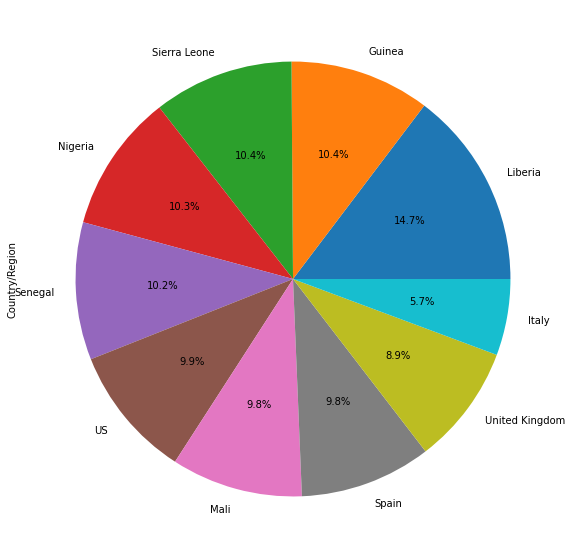

In [54]:
# Pie chart Ébola
plt.figure(figsize=(20,10))
ebola['Country/Region'].value_counts().plot.pie(autopct="%1.1f%%",textprops=dict(color="k"))

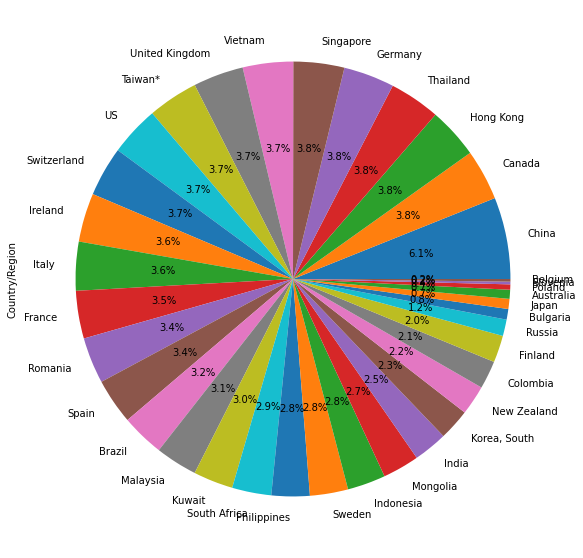

In [55]:
# Pie chart SARS
plt.figure(figsize=(20,10))
sars['Country/Region'].value_counts().plot.pie(autopct="%1.1f%%",textprops=dict(color="k"))

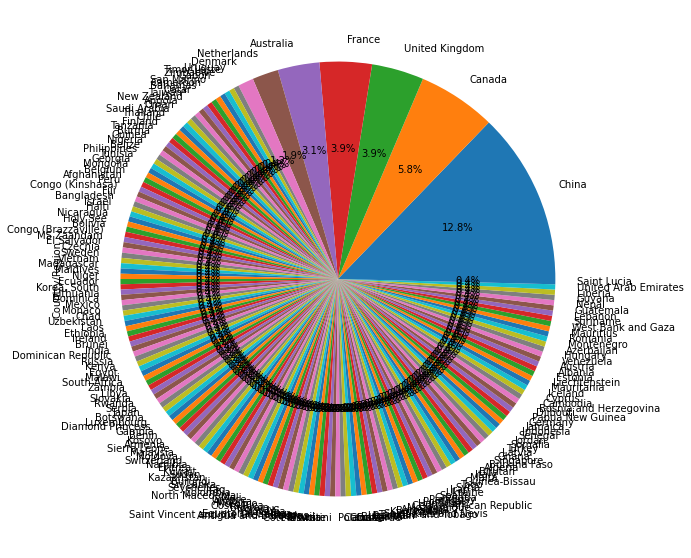

In [56]:
# Pie chart Covid-19
plt.figure(figsize=(20,10))
covid['Country/Region'].value_counts().plot.pie(autopct="%1.1f%%",textprops=dict(color="k"))

### Geopandas 

In [57]:
# Geopandas
gdf_ebola = gpd.GeoDataFrame(ebola,geometry=gpd.points_from_xy(ebola['Long'],ebola['Lat']))

In [58]:
gdf_ebola

,Country/Region,Date,Confirmed,Deaths,Lat,Long,geometry
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600,POINT (-9.69660 9.94560)
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300,POINT (8.67530 9.08200)
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889,POINT (-11.77989 8.46056)
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500,POINT (-9.42950 6.42810)
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889,POINT (-11.77989 8.46056)
...,...,...,...,...,...,...,...
2480,Liberia,2016-03-23,3151.0,NaN,6.428100,-9.429500,POINT (-9.42950 6.42810)
2481,Italy,2016-03-23,1.0,NaN,43.000000,12.000000,POINT (12.00000 43.00000)
2482,Liberia,2016-03-23,2.0,1.0,6.428100,-9.429500,POINT (-9.42950 6.42810)
2483,Nigeria,2016-03-23,19.0,7.0,9.082000,8.675300,POINT (8.67530 9.08200)


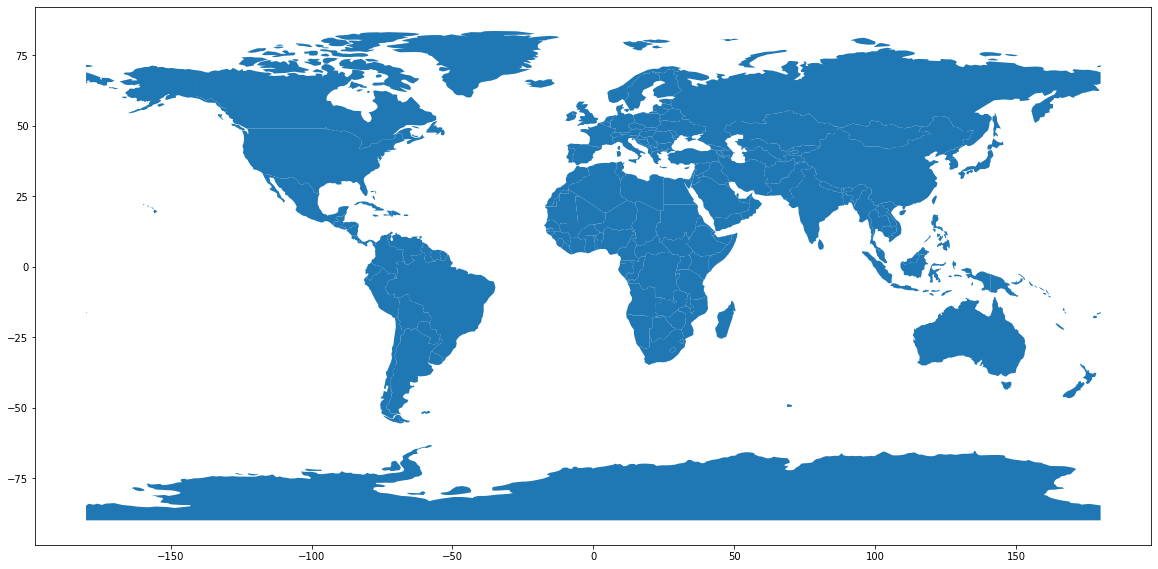

In [59]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = world.plot(figsize=(20,10))

### Geopandas Ébola

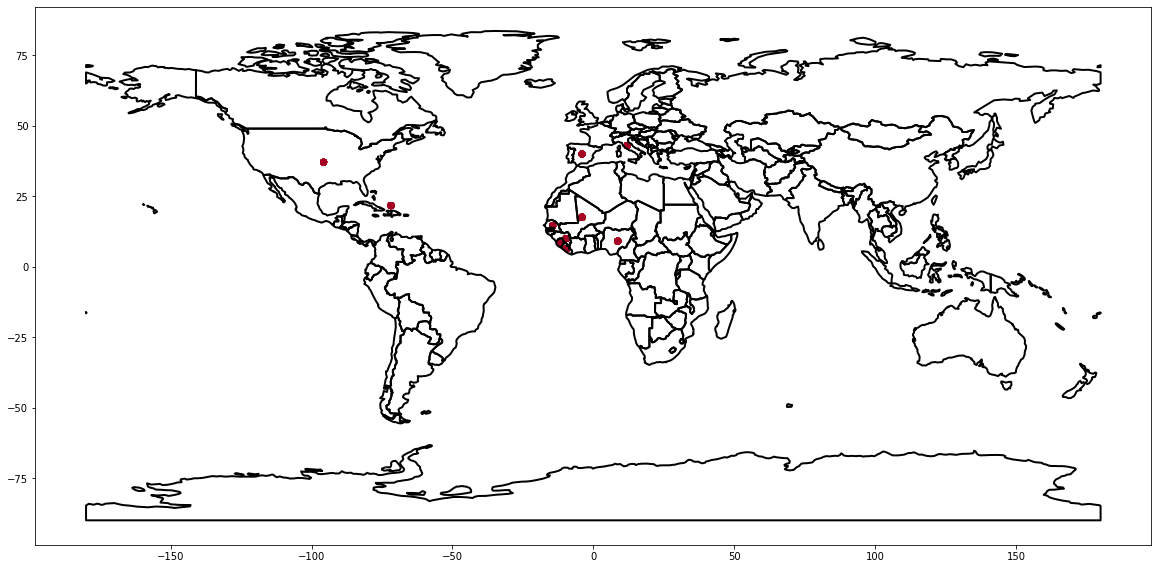

In [60]:
# Geopandas Ébola
fig,ax = plt.subplots(figsize=(20,10))
gdf_ebola.plot(cmap='RdYlGn_r',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

### Geopandas SARS

In [61]:
# Geopandas SARS
gdf_sars = gpd.GeoDataFrame(sars,geometry=gpd.points_from_xy(sars['Long'],sars['Lat']))

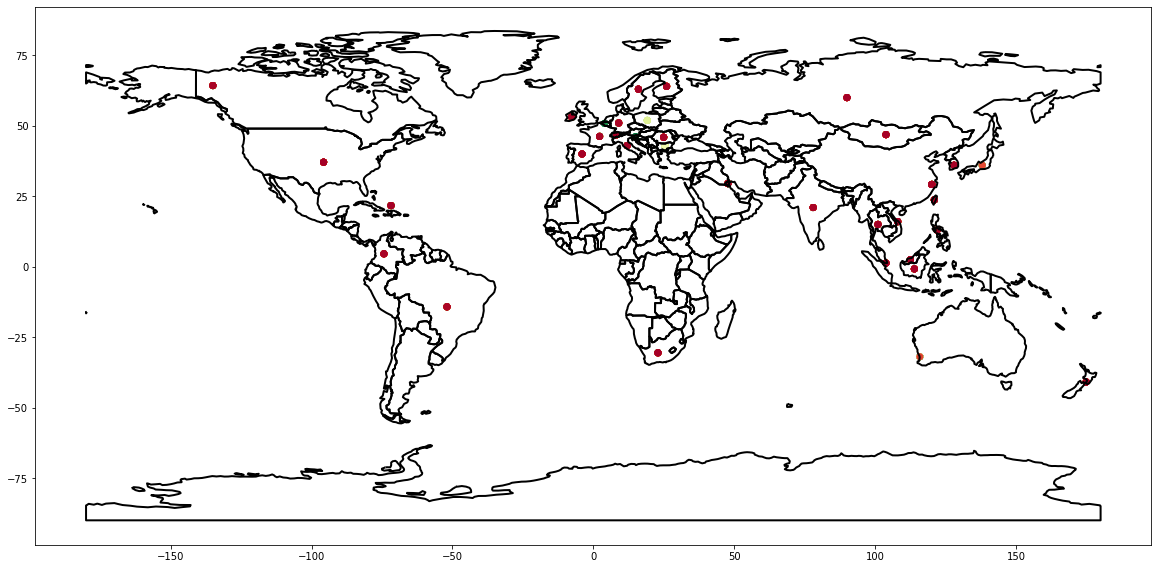

In [62]:
fig,ax = plt.subplots(figsize=(20,10))
gdf_sars.plot(cmap='RdYlGn_r',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

### Geopandas Covid-19

In [63]:
# Geopandas Covid-19
gdf_covid = gpd.GeoDataFrame(covid,geometry=gpd.points_from_xy(covid['Long'],covid['Lat']))

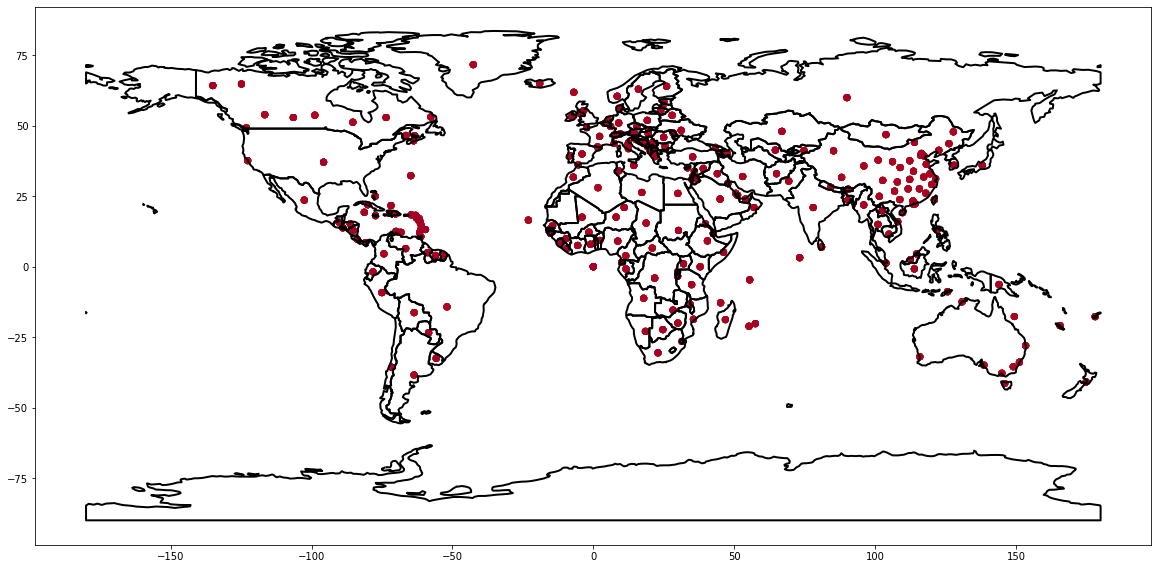

In [64]:
fig,ax = plt.subplots(figsize=(20,10))
gdf_covid.plot(cmap='RdYlGn_r',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)